Step 1: Mount **Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Install Required **Libraries**

In [11]:
!pip install shap xgboost


Step 3: Import **Libraries**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
import pickle
import shap


 Step 4: Upload and Load Dataset

In [13]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))  # Upload your diabetes.csv file
df.head()


Saving diabetes.csv to diabetes (1).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 5: Add Unique Lifestyle **Features**

In [14]:
np.random.seed(42)
df['daily_steps'] = np.random.randint(1000, 10000, df.shape[0])
df['sleep_hours'] = np.round(np.random.uniform(4, 10, df.shape[0]), 1)
df['diet_score'] = np.round(np.random.uniform(1, 10, df.shape[0]), 1)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,daily_steps,sleep_hours,diet_score
0,6,148,72,35,0,33.6,0.627,50,1,8270,6.0,5.3
1,1,85,66,29,0,26.6,0.351,31,0,1860,9.4,7.2
2,8,183,64,0,0,23.3,0.672,32,1,6390,7.6,1.2
3,1,89,66,23,94,28.1,0.167,21,0,6191,5.5,3.9
4,0,137,40,35,168,43.1,2.288,33,1,6734,7.0,9.8


Step 6: Correlation Heatmap

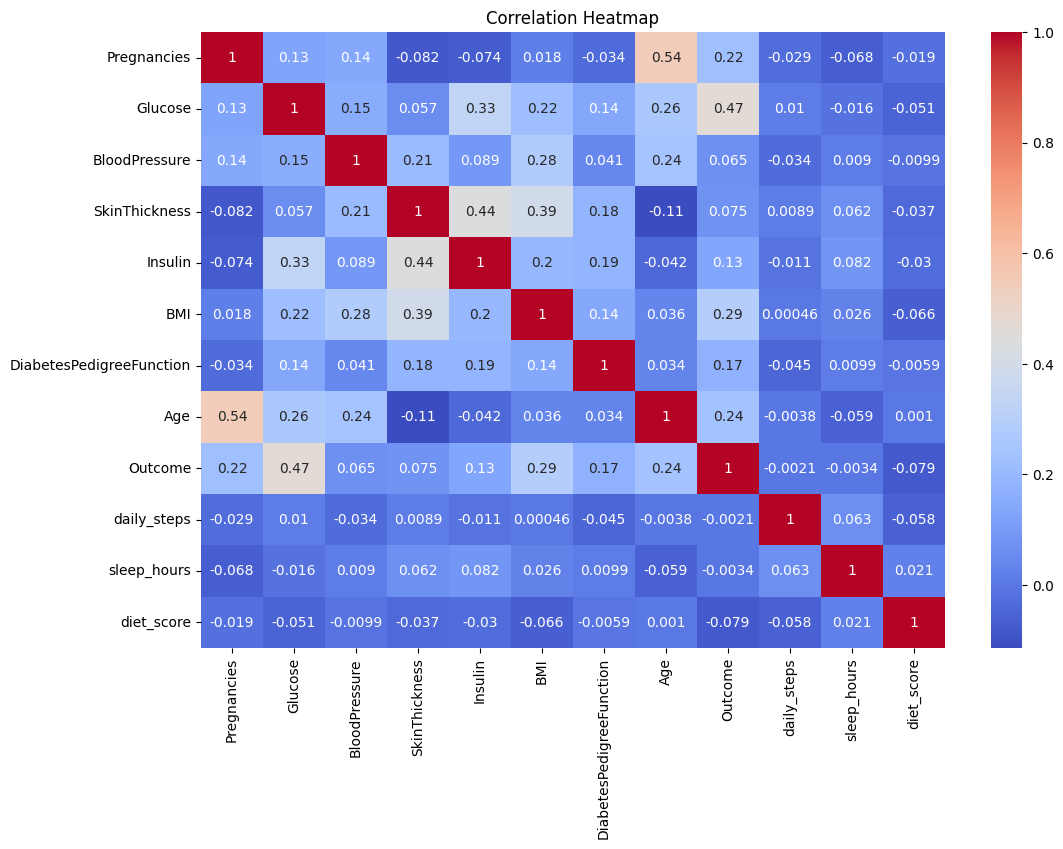

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



 Step 7: Data Preprocessing

In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


 Step 8: Define and Train All 6 Models

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    print(f"\n🔍 Model: {name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔍 Model: Logistic Regression
Accuracy: 0.7597402597402597
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


🔍 Model: K-Nearest Neighbors
Accuracy: 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.59      0.53      0.56        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154


🔍 Model: Support Vector Machine
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:39:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Step 9 : Save al the trained models in colab

In [22]:
import os

# Create a folder to store models
os.makedirs("saved_models", exist_ok=True)

# Save all models individually
for name, model in models.items():
    filename = f"saved_models/{name.replace(' ', '_').lower()}.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

print("✅ All models saved in 'saved_models/' folder.")


✅ All models saved in 'saved_models/' folder.


Step 10: Compare Models (Bar Chart)

<ipython-input-18-64e58873757a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


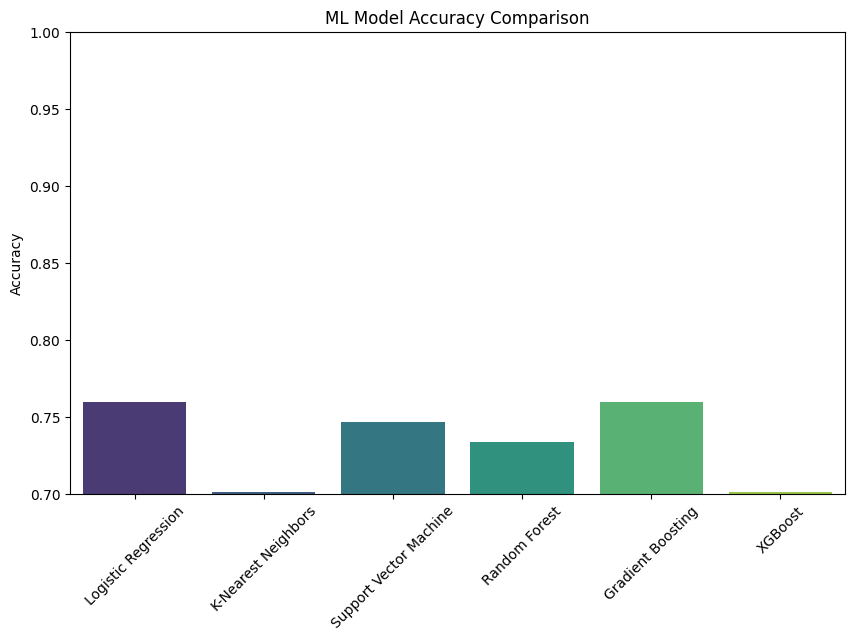

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("ML Model Accuracy Comparison")
plt.ylim(0.7, 1.0)
plt.show()


Step 11: Save the Best Model

In [19]:
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print("✅ Best Model:", best_model_name)

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


✅ Best Model: Logistic Regression


Step 12: SHAP Explainability (For Best Model)

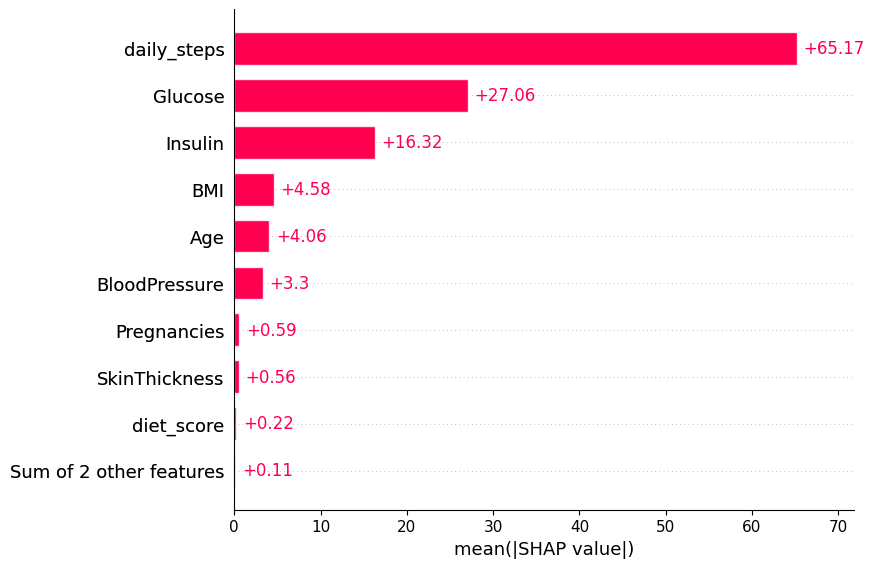

In [20]:
explainer = shap.Explainer(best_model, X)
shap_values = explainer(X)

shap.plots.bar(shap_values)


Step 11: Download the Model

In [21]:
from google.colab import files
files.download("best_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 13 : Download all the saved model in your pc

In [23]:
import shutil

# Zip the folder
shutil.make_archive('all_models', 'zip', 'saved_models')

# Download the zip
from google.colab import files
files.download('all_models.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>